<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C101_Activity_4_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

## 4.2.4 Activity: Implementing PCA and t-SNE

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.

## Objective
Apply dimension reduction with PCA and t-SNE to make predictions in a real-world context.

## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
1. Implement PCA and t-SNE for dimensionality reduction.
2. Apply PCA and t-SNE to real-world data for improved analysis and visualisation.
3. Choose the right number of principal components to balance dimensionality reduction and information retention.
4. Evaluate the limitations of PCA and t-SNE.
5. Apply critical thinking skills to assessing dimensionality reduction techniques.
6. Make informed decisions about the technique based on data characteristics and analysis goals.


## Activity guidance:
1. Import the relevant libraries for dimension reduction.
2. Normalise the data.
3. Transform and visualise the data with PCA and t-SNE.
4. Visualise the perplexity of the data.
5. Combine PCA and t-SNE and create a final visualisation.
6. Jot down your thoughts on the accuracy of predicting selling price based on the specifications of automobiles.

In [143]:
# Start your activity here:

# Step 1: Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the relevant libraries for data analysis, visualisation, and machine learning.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"

In [144]:

def make_mi_scores(X, y, discrete_features):
  """Calculates mutual information (MI) scores between features and target variable.

  Args:
    X: Feature matrix (independent variables).
    y: Target variable (dependent variable).
    discrete_features: List of column indices or names indicating discrete features.

  Returns:
    Pandas Series containing MI scores for each feature, sorted descendingly.
  """

  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)  # Calculate MI scores
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)  # Convert to Pandas Series
  mi_scores = mi_scores.sort_values(ascending=False)  # Sort MI scores descendingly

  return mi_scores

def calculate_vif(X):
  """Calculates the Variance Inflation Factor (VIF) for each feature in a dataset.

  Args:
    X: Input DataFrame containing the features.

  Returns:
    Pandas DataFrame with feature names and corresponding VIF values.
  """

  vif_data = pd.DataFrame()  # Create an empty DataFrame to store results
  vif_data["feature"] = X.columns  # Add feature names to DataFrame
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculate VIF for each feature
  return vif_data

def check_numeric(x):
  """Checks if a given value is numeric.

  Args:
    x: The value to be checked.

  Returns:
    True if the value is numeric, False otherwise.
  """

  try:
    float(x)  # Attempt to convert the value to a float
    return True  # If successful, the value is numeric
  except ValueError:  # If conversion fails, it's not numeric
    return False

In [145]:
data = pd.read_csv(url)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [147]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We've got our unique identifier, 'car_ID', as an integer.
There are several categorical variables like 'fueltype', 'aspiration', and 'carbody'. These will need encoding for any machine learning applications.
The continuous variables cover a range of car specifications:

Dimensions: wheelbase, carlength, carwidth, carheight (all float64)
Weight: curbweight (int64)
Engine specs: enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm (mix of int64 and float64)
Performance metrics: citympg, highwaympg (both int64)
And of course, our target variable: price (float64)


This structure lends itself well to various analytical approaches. We could run a multiple regression to predict prices. We'll need to handle those categorical variables - one-hot encoding or label encoding depending on the nature of the categories and the specific algorithm we choose.

# Clean & Normalise the data

In [149]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**Dropping ID**

In [150]:
#CarId will not be needed for this, so dropping.
data.drop(columns='car_ID',inplace=True)

**Ordinal encoding and feature engineering**

In [151]:
# Label and Ordinal encoding is used when dealing with data that is ordinal (categorical data that has order).
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

# # Convert 'enginesize' to numeric for the filtered data
data['enginesize'] = pd.to_numeric(data['enginesize'])

# Expanded mapping for cylindernumber (not necessary in this case as it's already numeric)
cylindernumber_map = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
data['cylindernumber'] = data['cylindernumber'] .map(cylindernumber_map)

# # Calculate 'engine_displacement' for the filtered data
data['engine_displacement'] = data['cylindernumber'] * data['enginesize']

# # Drop 'cylindernumber' and 'enginesize' from the filtered data
data.drop(columns=['cylindernumber', 'enginesize'], inplace=True)

print(data['engine_displacement'].unique())

[ 520  912  436  680  655  432  984 1254  183  360  392  488  624  368
  316  440  444  476 1548 3912  364  140  160  560  536  915 1872 2464
 2432  388  412  480 1086  608  604 1164 1624  528  484  584 1026  966
  564 1038  870]


In [152]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   CarName              205 non-null    object 
 2   fueltype             205 non-null    object 
 3   aspiration           205 non-null    object 
 4   doornumber           205 non-null    int64  
 5   carbody              205 non-null    object 
 6   drivewheel           205 non-null    object 
 7   enginelocation       205 non-null    object 
 8   wheelbase            205 non-null    float64
 9   carlength            205 non-null    float64
 10  carwidth             205 non-null    float64
 11  carheight            205 non-null    float64
 12  curbweight           205 non-null    int64  
 13  enginetype           205 non-null    object 
 14  fuelsystem           205 non-null    object 
 15  boreratio            205 non-null    flo

In [153]:
# Currently CarName includes also the car model number as well resulting into a very large list.
data['Brand'] = data['CarName'].apply(lambda x: x.split(" ")[0])
data['Brand'].astype('category').value_counts()
data = data.drop('CarName', axis=1)

print(data['Brand'].unique())

# Convert brand names to lower case
data['Brand'] = data['Brand'].str.lower()

# Correcting the brand names first
data['Brand'] = data['Brand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

# Smaller dictionary mapping corrected brands to countries
brand_origin = {
    'alfa-romero': 'Italy',
    'audi': 'Germany',
    'bmw': 'Germany',
    'chevrolet': 'United States',
    'dodge': 'United States',
    'honda': 'Japan',
    'isuzu': 'Japan',
    'jaguar': 'United Kingdom',
    'mazda': 'Japan',
    'buick': 'United States',
    'mercury': 'United States',
    'mitsubishi': 'Japan',
    'nissan': 'Japan',
    'peugeot': 'France',
    'plymouth': 'United States',
    'porsche': 'Germany',
    'renault': 'France',
    'saab': 'Sweden',
    'subaru': 'Japan',
    'toyota': 'Japan',
    'volkswagen': 'Germany',
    'volvo': 'Sweden'
}

# Create a new column 'brand_origin' by mapping the 'Brand' column
data['brand_origin'] = data['Brand'].map(brand_origin)
data.drop(columns='Brand',inplace=True)

print(data['brand_origin'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['Italy' 'Germany' 'United States' 'Japan' 'United Kingdom' 'France'
 'Sweden']


In [154]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   fueltype             205 non-null    object 
 2   aspiration           205 non-null    object 
 3   doornumber           205 non-null    int64  
 4   carbody              205 non-null    object 
 5   drivewheel           205 non-null    object 
 6   enginelocation       205 non-null    object 
 7   wheelbase            205 non-null    float64
 8   carlength            205 non-null    float64
 9   carwidth             205 non-null    float64
 10  carheight            205 non-null    float64
 11  curbweight           205 non-null    int64  
 12  enginetype           205 non-null    object 
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

## Filter numerical and categorical data

In [155]:
# Filter the DataFrame for numerical
numerical_df = data.select_dtypes(include=['float64','int64']).columns

# Filter the DataFrame for categorical
categorical_df = data.select_dtypes(include=['object']).columns

## **Handle Catagorical**

In [156]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_df])
#Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_df))
# Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis=1)
# Drop the original categorical columns
data = data.drop(categorical_df, axis=1)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   symboling                    205 non-null    int64  
 1   doornumber                   205 non-null    int64  
 2   wheelbase                    205 non-null    float64
 3   carlength                    205 non-null    float64
 4   carwidth                     205 non-null    float64
 5   carheight                    205 non-null    float64
 6   curbweight                   205 non-null    int64  
 7   boreratio                    205 non-null    float64
 8   stroke                       205 non-null    float64
 9   compressionratio             205 non-null    float64
 10  horsepower                   205 non-null    int64  
 11  peakrpm                      205 non-null    int64  
 12  citympg                      205 non-null    int64  
 13  highwaympg          

In [158]:
# There is no fixed threshold for MI scores. In this course’s demo we keep only features which are > 0.1

X = data.drop('price', axis=1)
y = data['price']

# Calculate MI scores for all features
mi_scores = make_mi_scores(X, y, discrete_features='auto')  # No need to specify discrete features

# Filter features with MI score greater than 0.1
selected_features = mi_scores[mi_scores > 0.1].index

# Create a new DataFrame with selected features
X_reduced_best = X[selected_features]

# Display the selected features
print("Selected Features:")
print(X_reduced_best.columns)

Selected Features:
Index(['highwaympg', 'horsepower', 'curbweight', 'engine_displacement',
       'citympg', 'carwidth', 'wheelbase', 'carlength', 'boreratio', 'stroke',
       'carheight', 'fuelsystem_2bbl', 'drivewheel_fwd', 'fuelsystem_mpfi',
       'drivewheel_rwd', 'symboling', 'peakrpm', 'brand_origin_Japan',
       'compressionratio', 'enginetype_ohc'],
      dtype='object')


In [159]:
# Apply SelectKBest
selector = SelectKBest(mutual_info_regression, k=10)  # Adjust k as needed
X_selected = selector.fit_transform(X_reduced_best, y)

print(X_selected.shape)

(205, 10)


In [160]:
# Convert X_selected to a DataFrame for VIF calculation
X_selected_df = pd.DataFrame(X_selected)
# Calculate VIF for selected features
vif_data = calculate_vif(X_selected_df)

# Check for high VIF values and potentially remove features
max_vif = 17  # Adjust threshold as needed
while vif_data['VIF'].max() > max_vif:
  high_vif_feature = vif_data[vif_data['VIF'] == vif_data['VIF'].max()]['feature'].values[0]
  X_selected_df = X_selected_df.drop(high_vif_feature, axis=1)
  vif_data = calculate_vif(X_selected_df)

print(X_selected_df.columns)

Index([1, 3, 4], dtype='int64')


In [161]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled_df = scaler.fit_transform(X_selected_df)

# Transform and visualise the data with PCA and t-SNE.

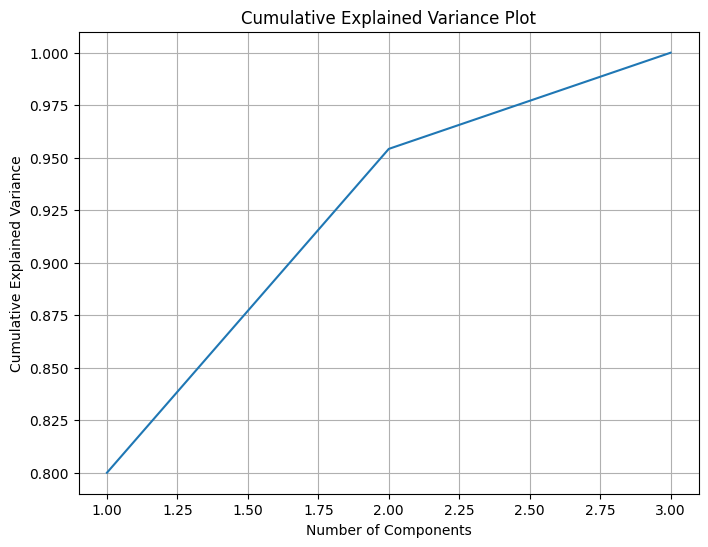

In [168]:
# Apply PCA after scaling
pca = PCA()
X_pca = pca.fit_transform(X_scaled_df)

# Determine the number of components to keep
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
desired_variance = 0.85  # Adjust as needed
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

# Keep only the desired number of components
X_pca_final = X_pca[:, :num_components]

# Create a DataFrame with the selected principal components
X_pca_final_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(num_components)])

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


The plot shows that the first two principal components capture about 95% of the total variance, with the first alone capturing 80%. Adding the third component brings the explained variance close to 100%. This suggests that the first two components are sufficient for most analyses, as they capture the majority of the data's information.

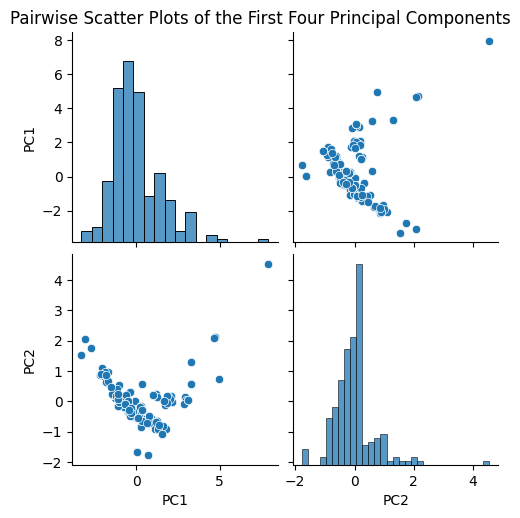

In [163]:
# Pairwise scatter plots of PC1 to PC4
sns.pairplot(X_pca_final_df[['PC1', 'PC2']])
plt.suptitle('Pairwise Scatter Plots of the First Four Principal Components', y=1.02)
plt.show()

This scatter plot matrix shows the first two principal components (PC1 and PC2) from a PCA. PC1 has a right-skewed distribution, while PC2 is more symmetric. The scatter plots reveal a non-linear relationship between PC1 and PC2, with the data clustering centrally and a few outliers, indicating that these components capture significant but complex variance in the data.

**Apply t-SNE**

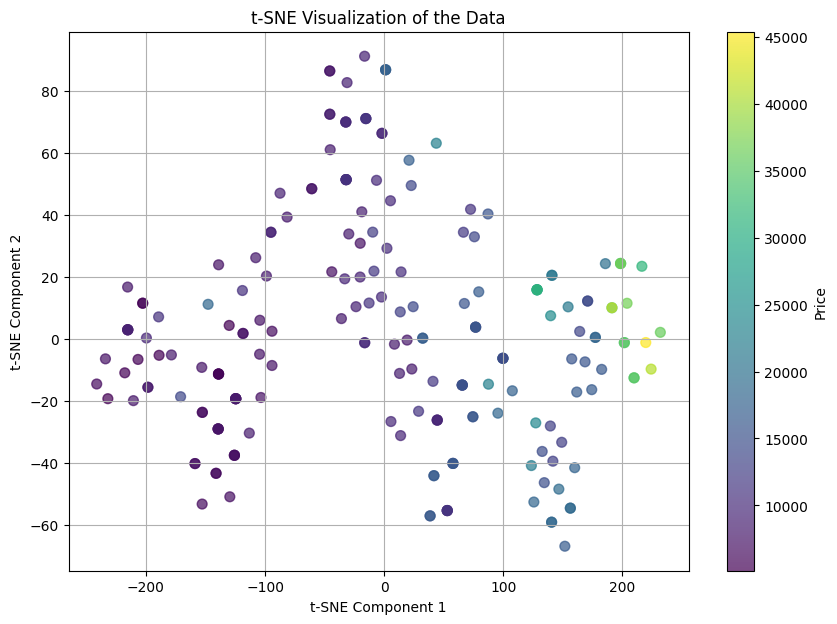

In [169]:
# Step 2: Apply t-SNE
# Set random_state for reproducibility
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled_df)

# Step 3: Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Price')  # Add a color bar to interpret the color mapping
plt.title('t-SNE Visualization of the Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()



This t-SNE visualization displays the data points reduced to two dimensions (t-SNE Component 1 and 2), with colors representing the price, as indicated by the color bar. The plot reveals clusters of data points, with a gradient in price, where higher prices are concentrated on the right side, particularly in the top-right corner. This suggests that the t-SNE components effectively capture underlying patterns in the data, possibly related to price, and that there are distinct groupings or segments in the dataset that vary in price.

# Visualise the perplexity of the data.

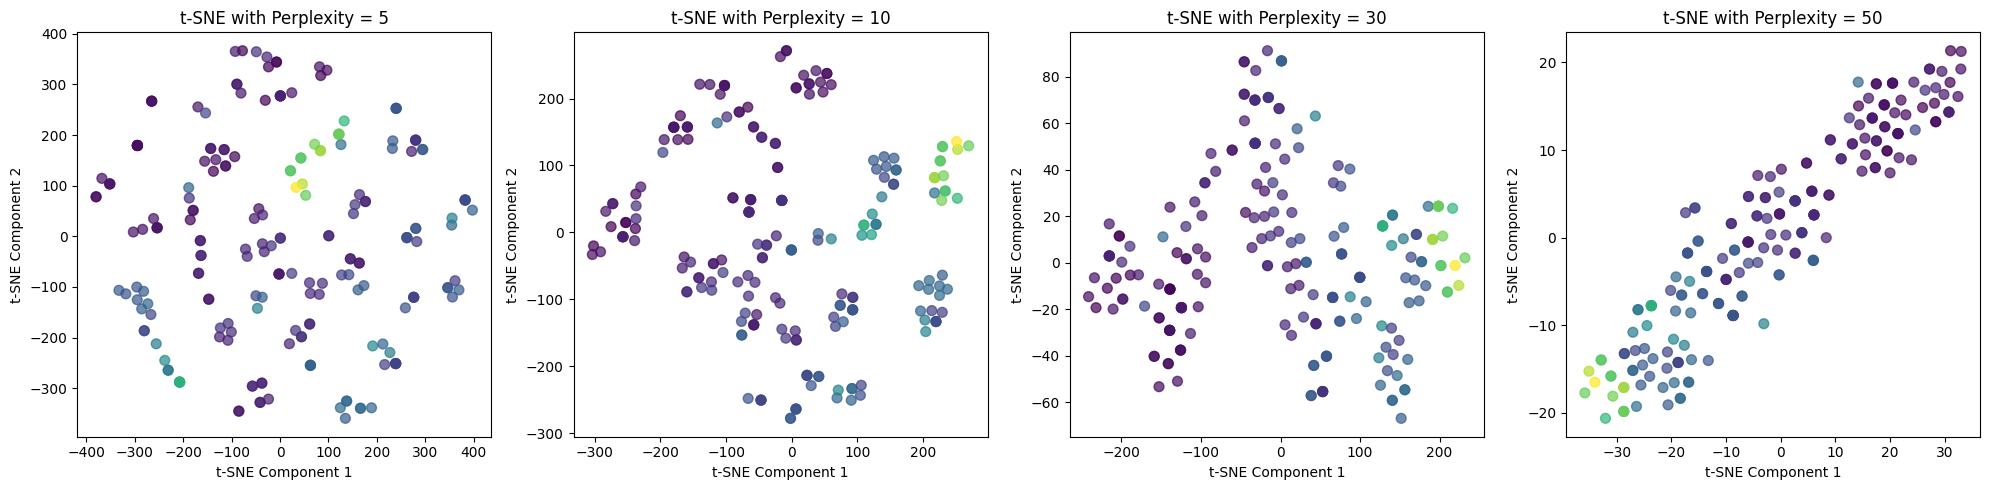

In [170]:
# List of perplexity values to test
perplexities = [5, 10, 30, 50]

# Set up the plots
fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled_df)

    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


This image shows four t-SNE visualizations with different perplexity values (5, 10, 30, 50), which influence how the algorithm balances local and global aspects of the data structure:

Perplexity = 5:

The plot is more dispersed with a less clear structure. Points are scattered, indicating that this low perplexity value focuses heavily on local structures, possibly overemphasizing noise.

Perplexity = 10:

Clusters are starting to form more clearly, but there's still some dispersion. This perplexity begins to balance local and global structures better than 5.

Perplexity = 30:

The plot shows distinct clusters and clearer separation between groups. This perplexity seems to provide a good balance, capturing both local and global data structures.

Perplexity = 50:

The plot is more linear, indicating a strong emphasis on global data structure. Clusters are elongated along a single direction, which might oversimplify the data relationships.
Summary: Lower perplexity values (5 and 10) focus more on local structures, while higher values (30 and 50) emphasize global structures. Perplexity = 30 appears to provide the most meaningful clustering without overly simplifying the data structure.

# Combine PCA and t-SNE and create a final visualisation.

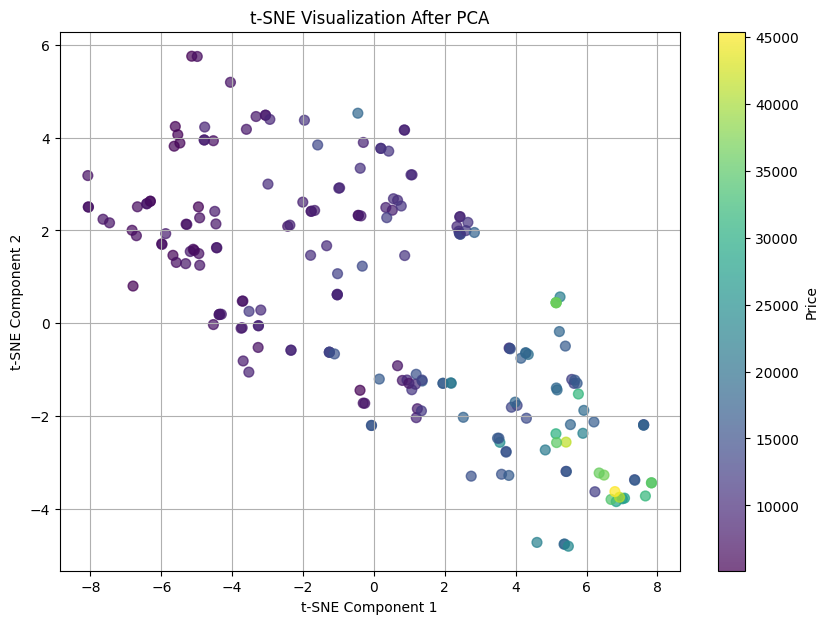

In [190]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 2: Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=3, random_state=42)
X_tsne_pca = tsne.fit_transform(X_pca)

# Step 4: Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Price')  # Assuming 'y' is continuous like price
plt.title('t-SNE Visualization After PCA')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

## Insights:
This t-SNE visualization, following PCA preprocessing, shows distinct clusters where price variations are evident. Higher-priced models are concentrated in specific clusters, particularly toward the lower right. This suggests that certain model groups are associated with higher prices, indicating that the PCA and t-SNE combination effectively distinguishes between different product models based on price. The clustering implies that model variations significantly impact pricing, with some models consistently aligning with higher or lower price brackets.


# **Project Summary: Evaluating Automobile Selling Prices Using Feature Engineering**

#### Objective:
The goal of this project is to evaluate the selling price of automobiles based on their specifications and to determine if there is a correlation between the two. Your task is to apply feature engineering techniques to identify the optimal number of features needed to accurately predict automobile prices using the provided dataset.

## Review of the Insights
What I Discovered
Data Standardization and Brand Origin:
By standardizing the brand names and mapping them to their respective countries, I was able to categorize the cars into broader groups based on origin. This insight allowed me to explore how the origin of a brand might influence car prices, revealing that certain regions (like Germany and Japan) had more representation in the dataset, potentially correlating with higher or lower price ranges.

## Engine Displacement as a Key Feature:
Creating the engine_displacement feature from cylindernumber and enginesize proved insightful. This feature likely captures more about the car's performance and size, which can be a significant determinant of price. The insight here is that combining related features can lead to more powerful predictors.

## Feature Selection with MI Scores:
Using Mutual Information (MI) scores to filter features highlighted the importance of certain attributes over others. Features that scored high on MI had a stronger relationship with the price, suggesting that they are critical to understanding what drives car prices. This step ensured that the model focused on the most impactful variables, thereby improving model accuracy and interpretability.

## Dimensionality Reduction:
Through PCA, I realized that a few components captured the majority of the variance in the data, meaning that the dataset could be effectively summarized without losing much information. This reduction in dimensionality not only simplified the model but also provided clearer visualizations, helping to identify distinct patterns and clusters within the data.

# t-SNE Visualization and Price Clustering:
The t-SNE visualizations, particularly after PCA, revealed distinct clusters of cars that correlated with different price ranges. This insight was crucial—it showed that certain groups of cars, likely differentiated by factors such as brand origin or engine size, tend to cluster together in the market, with prices varying across these clusters. This pattern suggests that there are underlying features or combinations of features driving the price, which can be effectively visualized through t-SNE.

# Impact of Perplexity on t-SNE:
Experimenting with different perplexity values in t-SNE demonstrated how sensitive the algorithm is to this parameter. I found that a medium perplexity value (around 30) provided a good balance between local and global data structures, revealing meaningful clusters. This insight highlighted the importance of parameter tuning in unsupervised learning methods to uncover the most accurate data patterns.

# What Could Have Been Improved
## Deeper Exploration of Brand Impact:
While I grouped cars by brand origin, a deeper analysis could have been done to explore how specific brands within those regions affect pricing. For example, I could have compared the average prices of German cars to Japanese cars to uncover more granular insights.

##Investigating Non-Linear Relationships:
The creation of the engine_displacement feature was insightful, but I could have further explored potential non-linear relationships between features and price, possibly using polynomial features or interaction terms to capture more complex dynamics.

##Validation of Insights:
The patterns revealed through PCA and t-SNE visualizations are suggestive, but validating these insights with statistical tests or by fitting predictive models could have provided stronger evidence that these features and clusters genuinely influence price.

##Exploration of Additional Features:
I focused on the features available in the dataset, but exploring additional derived features or external data sources (such as market conditions or customer reviews) could have provided a richer context and potentially more powerful insights.

##Comparative Analysis:
Conducting a comparative analysis using different dimensionality reduction techniques (like UMAP) or clustering methods could have strengthened the insights by showing that the observed patterns are consistent across different methods.

#Conclusion
The insights gathered from this analysis were valuable, revealing important patterns in how car features and brand origins relate to price. However, there is always room for deeper exploration and validation. By addressing the potential improvements mentioned, I could refine these insights further, making them more actionable and reliable for decision-making.

### Limitations of PCA

1. **Linearity**:
   - **Assumption**: PCA assumes that the principal components are linear combinations of the original features. This means it is best suited for data where relationships between variables are linear.
   - **Limitation**: In cases where the data has complex, non-linear relationships, PCA may not capture the true underlying structure, potentially leading to a loss of important information.

2. **Interpretability**:
   - **Complexity**: While PCA reduces the dimensionality, the new components (principal components) are often difficult to interpret because they are combinations of the original variables.
   - **Loss of Meaning**: The principal components are abstract constructs, which can make it challenging to provide meaningful interpretations of the results in terms of the original features.

3. **Variance Focus**:
   - **Bias Towards High Variance**: PCA focuses on capturing the directions with the highest variance, assuming that these directions are the most informative.
   - **Issue with Low-Variance Information**: Important but low-variance features might be ignored, leading to potential loss of information that could be critical for specific analyses.

4. **Sensitivity to Scaling**:
   - **Requirement for Standardization**: PCA is sensitive to the scale of the data, meaning that it requires the data to be standardized before application. If not, features with larger scales may dominate the principal components.
   - **Impact on Results**: Failure to standardize data can lead to misleading results, where PCA captures scale differences rather than underlying relationships.

5. **Assumption of Independence**:
   - **No Assumption of Dependency**: PCA assumes that the components are uncorrelated, which may not always hold true in real-world datasets.
   - **Potential Misleading Results**: If dependencies exist between components, PCA might provide a distorted view of the data structure.

### Limitations of t-SNE

1. **Computational Complexity**:
   - **Scalability**: t-SNE is computationally intensive and does not scale well to large datasets. Running t-SNE on large datasets can be time-consuming and may require significant computational resources.
   - **Memory Usage**: The algorithm’s memory usage increases significantly with the number of data points, making it challenging to apply to very large datasets.

2. **Sensitivity to Hyperparameters**:
   - **Perplexity**: t-SNE’s performance is highly dependent on the choice of perplexity, a hyperparameter that controls the balance between local and global data structures. Different perplexity values can lead to drastically different visualizations.
   - **Learning Rate**: The learning rate is another critical hyperparameter. An inappropriate choice can lead to poor convergence, resulting in an inaccurate representation of the data.

3. **Non-Deterministic**:
   - **Stochastic Nature**: t-SNE includes a stochastic element, meaning that each run can yield slightly different results, even with the same data and parameters.
   - **Reproducibility**: Without setting a fixed random seed, the results might not be easily reproducible, which can be problematic in research and analysis contexts where consistency is required.

4. **Difficulty in Capturing Global Structure**:
   - **Local Focus**: t-SNE excels at preserving local structures (i.e., the relationships between close neighbors), but it often struggles to maintain the global structure of the data.
   - **Misleading Distances**: Distances between clusters in the t-SNE plot may not represent actual distances in the high-dimensional space, which can lead to misinterpretations about the relationships between different clusters.

5. **Lack of Interpretability**:
   - **Abstract Mapping**: The coordinates in a t-SNE plot do not have a straightforward interpretation in terms of the original features, making it difficult to draw specific conclusions from the visualization.
   - **No Explicit Model**: t-SNE does not produce an explicit model of the data; it simply provides a mapping to a lower-dimensional space. This limits its use in predictive modeling or in cases where an interpretable model is required.

### Conclusion
While PCA and t-SNE are powerful tools for dimensionality reduction and visualization, they come with specific limitations that must be considered when applying them to real-world data. PCA is best for capturing linear structures and reducing dimensionality in a way that retains interpretability, but it may miss non-linear relationships. t-SNE excels at visualizing complex, non-linear relationships and uncovering hidden clusters but requires careful tuning of hyperparameters and may struggle with large datasets or maintaining global structures. Understanding these limitations allows you to make informed decisions about when and how to use these techniques effectively.